In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from falwa.oopinterface import QGFieldNHN22
from falwa.constant import SCALE_HEIGHT, P_GROUND

In [3]:
load_path = './npy_file.npy'
numpy_dicti = np.load(load_path, allow_pickle=True)

def file(key='uu', numpy_dicti=numpy_dicti):
    return numpy_dicti.item().get(key)

p0 = 0; y=1; eq_boundary_index=1
qgfield_object = QGFieldNHN22(file('xlon'), \
                              file('ylat'), \
                              file('plev')[p0:],    \
                              file('uu')[p0:,:, :], \
                              file('vv')[p0:,:, :], \
                              file('tt')[p0:,:, :],
    kmax=70, dz=500, eq_boundary_index=eq_boundary_index)
equator_idx = qgfield_object.equator_idx

qgfield_object.interpolate_fields(return_named_tuple=False)
qgfield_object.compute_reference_states(return_named_tuple=False)
qgfield_object.compute_lwa_and_barotropic_fluxes(return_named_tuple=False)


 nlon, nlat, nlev, kmax, jd
         288         193          36          70          97


Yes


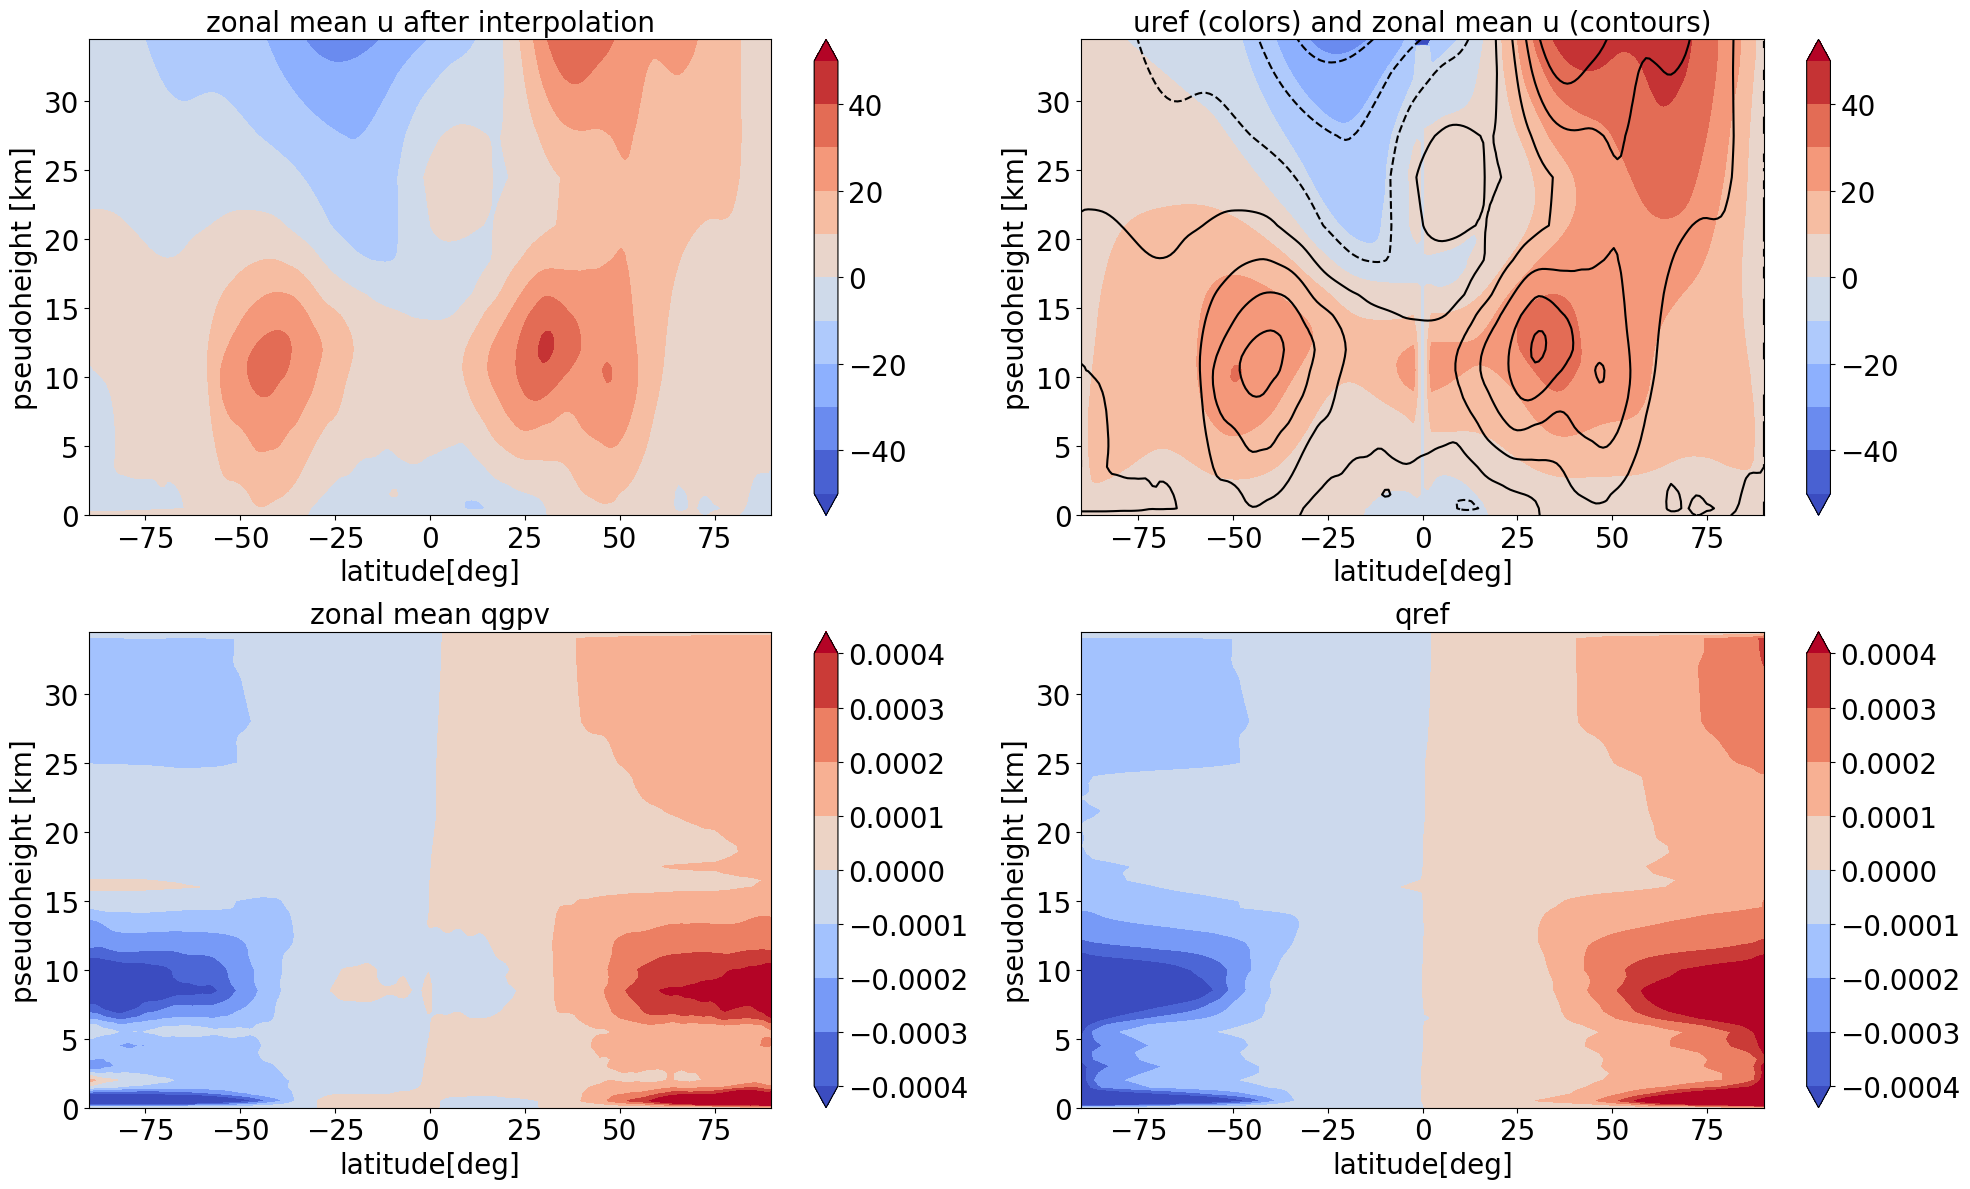

In [4]:

ylat = file('ylat')

cmap = plt.cm.coolwarm
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.contourf(qgfield_object.ylat, qgfield_object.height/1000, qgfield_object.interpolated_u.mean(axis=-1), np.arange(-50, 60, 10), cmap=cmap, extend='both'); 
plt.title('zonal mean u after interpolation', fontsize=20)
plt.xlabel('latitude[deg]', fontsize=20)
plt.ylabel('pseudoheight [km]', fontsize=20)
cbar = plt.colorbar(); cbar.ax.tick_params(labelsize=20)
plt.tick_params(labelsize=20)


plt.subplot(2,2,3)
plt.contourf(qgfield_object.ylat, qgfield_object.height/1000, qgfield_object.qgpv.mean(axis=-1), \
             np.arange(-4,5,1)*0.0001, cmap=cmap, extend='both'); 
plt.title('zonal mean qgpv', fontsize=20)
plt.xlabel('latitude[deg]', fontsize=20)
plt.ylabel('pseudoheight [km]', fontsize=20)
cbar = plt.colorbar(); cbar.ax.tick_params(labelsize=20)
plt.tick_params(labelsize=20)


plt.subplot(2,2,4)
plt.contourf(qgfield_object.ylat, qgfield_object.height/1000, qgfield_object.qref, np.arange(-4,5,1)*0.0001, cmap=cmap, extend='both'); 
plt.title('qref', fontsize=20)
plt.xlabel('latitude[deg]', fontsize=20)
plt.ylabel('pseudoheight [km]', fontsize=20)
plt.tick_params(labelsize=20)
cbar = plt.colorbar(); cbar.ax.tick_params(labelsize=20)

plt.subplot(2,2,2)
plt.contourf( qgfield_object.ylat, qgfield_object.height/1000, qgfield_object.uref, np.arange(-50, 60, 10), cmap=cmap, extend='both'); 
cbar = plt.colorbar(); cbar.ax.tick_params(labelsize=20)
plt.contour(qgfield_object.ylat, qgfield_object.height/1000, qgfield_object.interpolated_u.mean(axis=-1), np.arange(-50, 60, 10), colors='k')
plt.title('uref (colors) and zonal mean u (contours)', fontsize=20)
plt.xlabel('latitude[deg]', fontsize=20)
plt.ylabel('pseudoheight [km]', fontsize=20)
plt.tick_params(labelsize=20)
plt.tight_layout()
print("Yes")
plt.show()
# qgfield_object.compute_lwa_and_barotropic_fluxes(return_named_tuple=False)

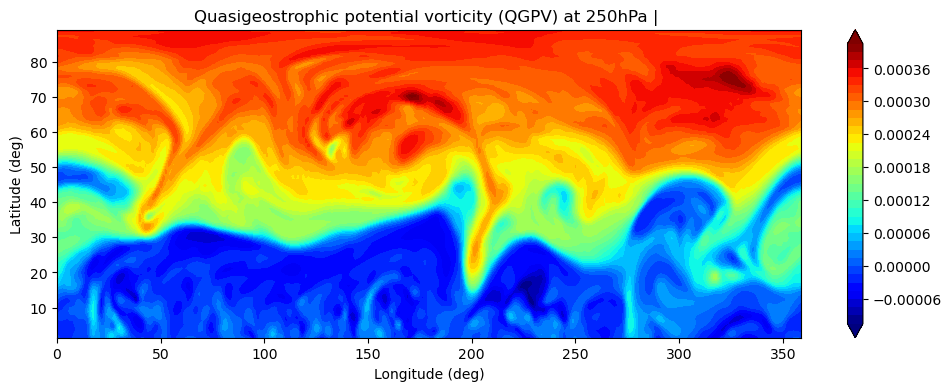

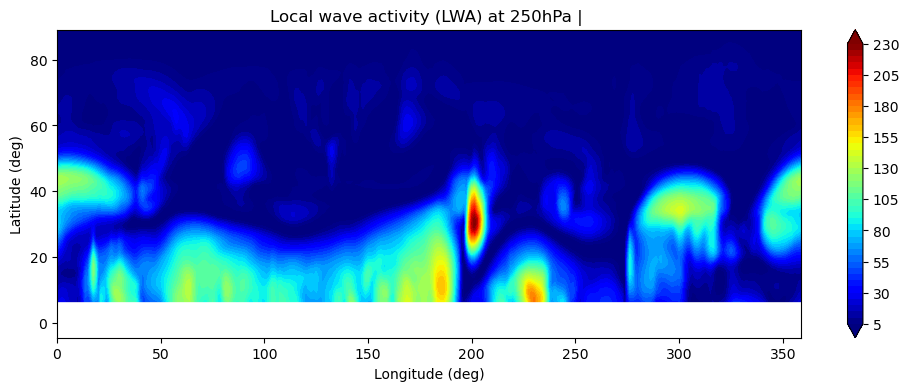

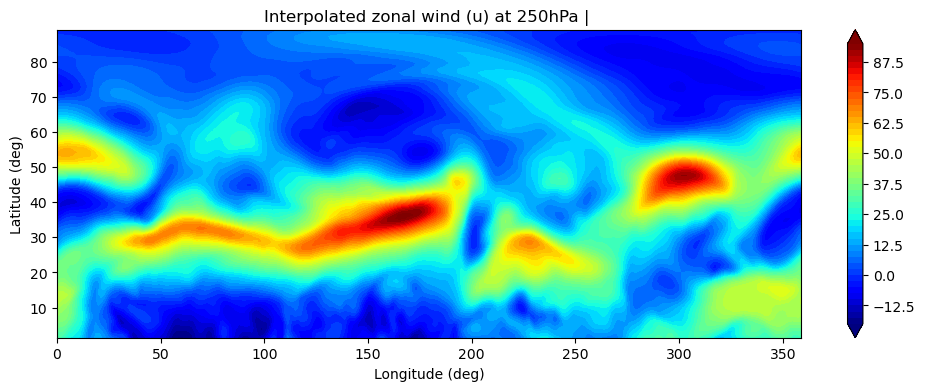

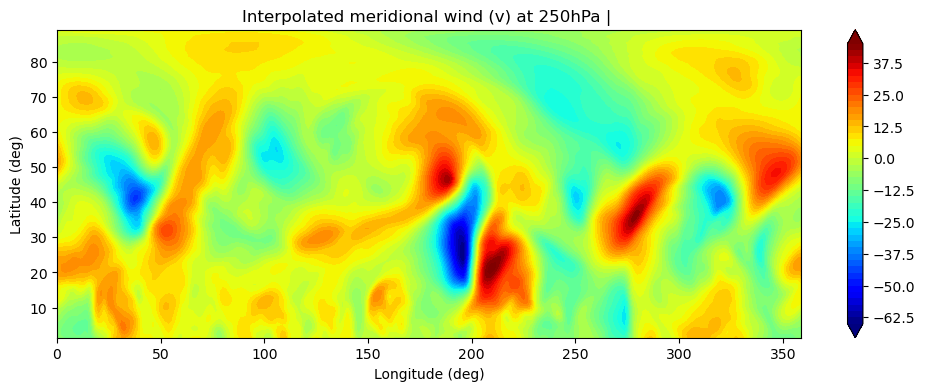

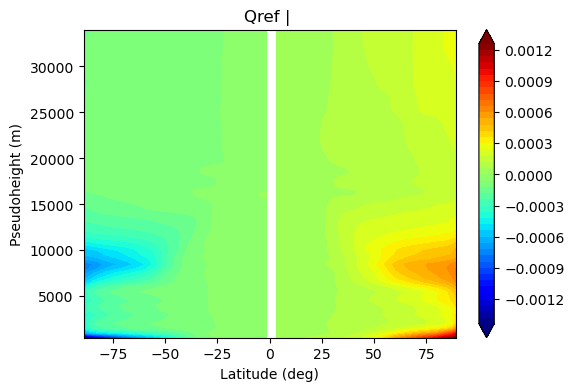

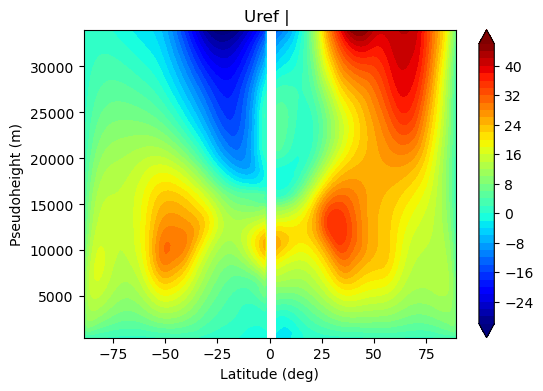

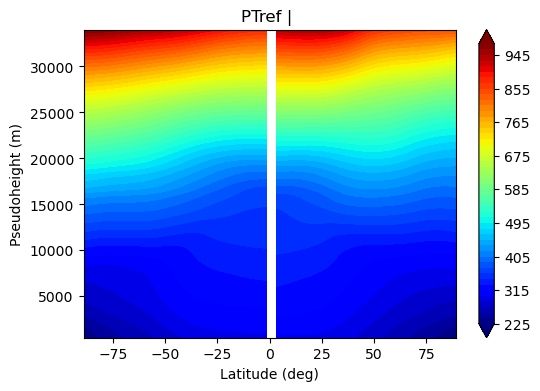

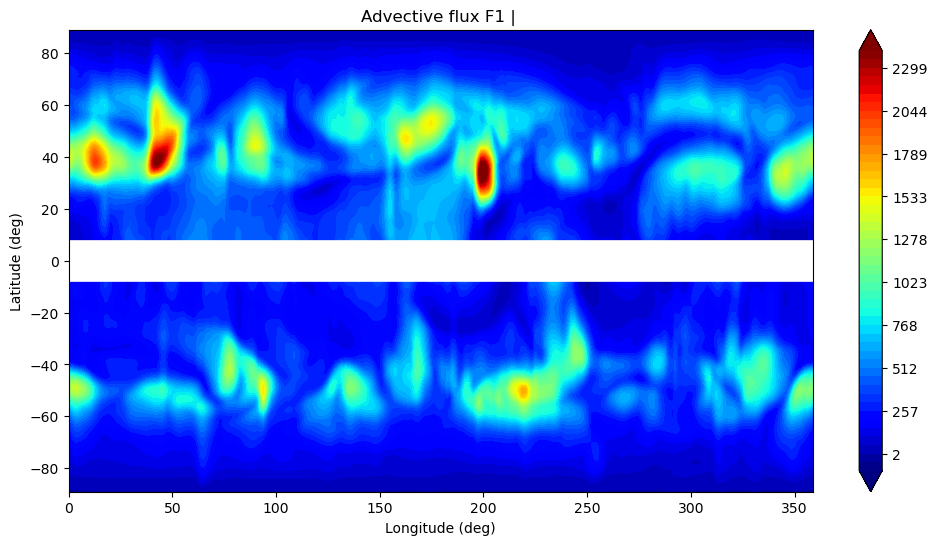

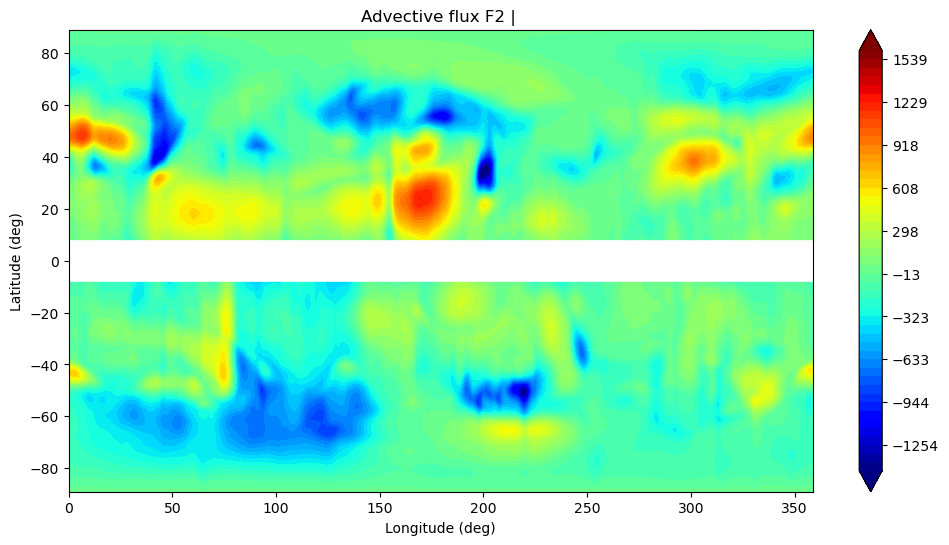

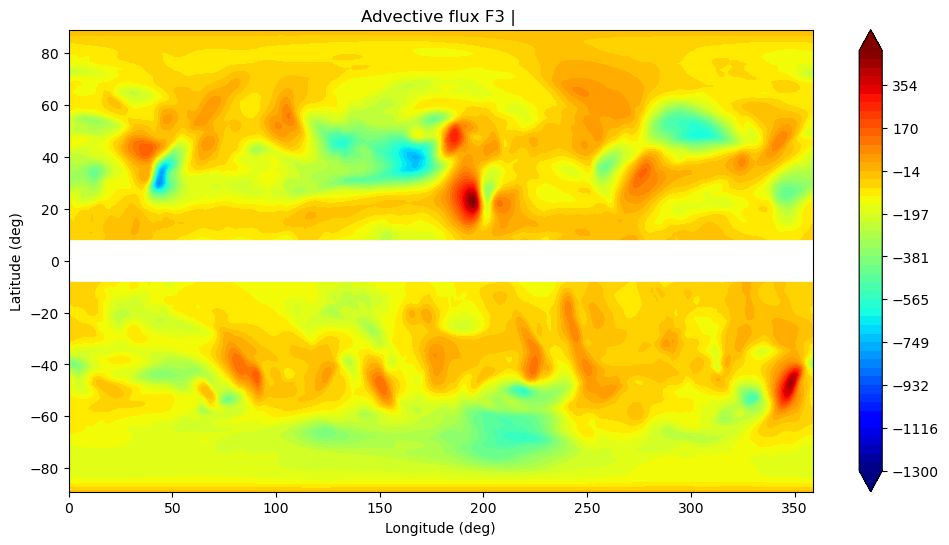

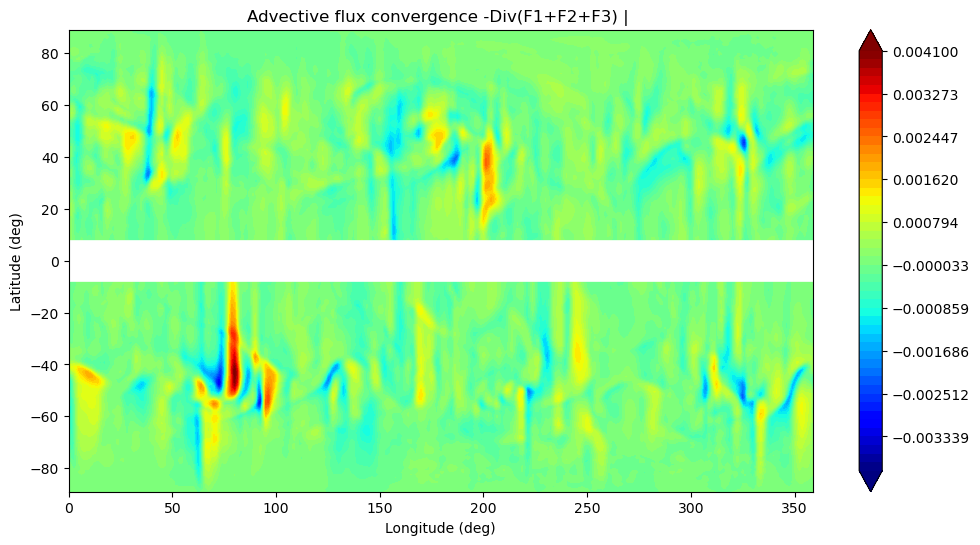

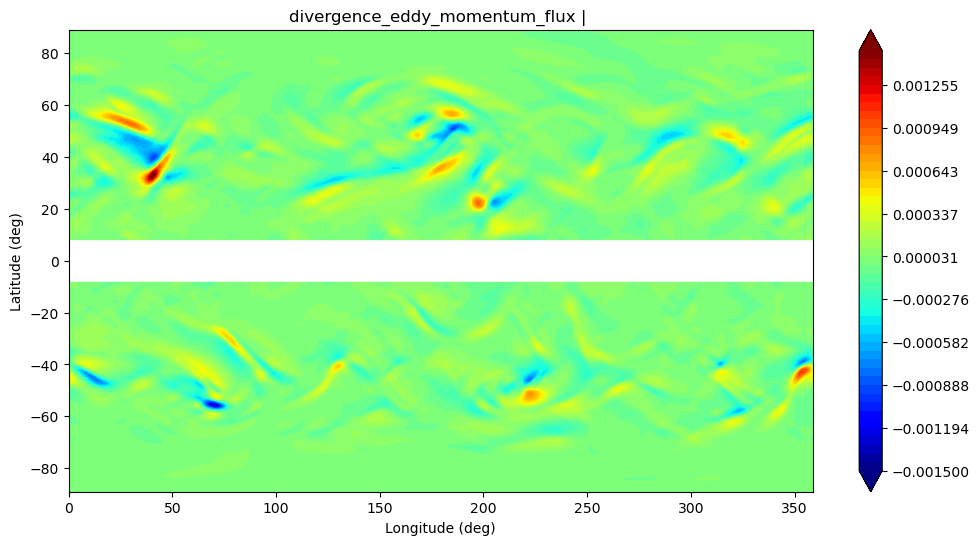

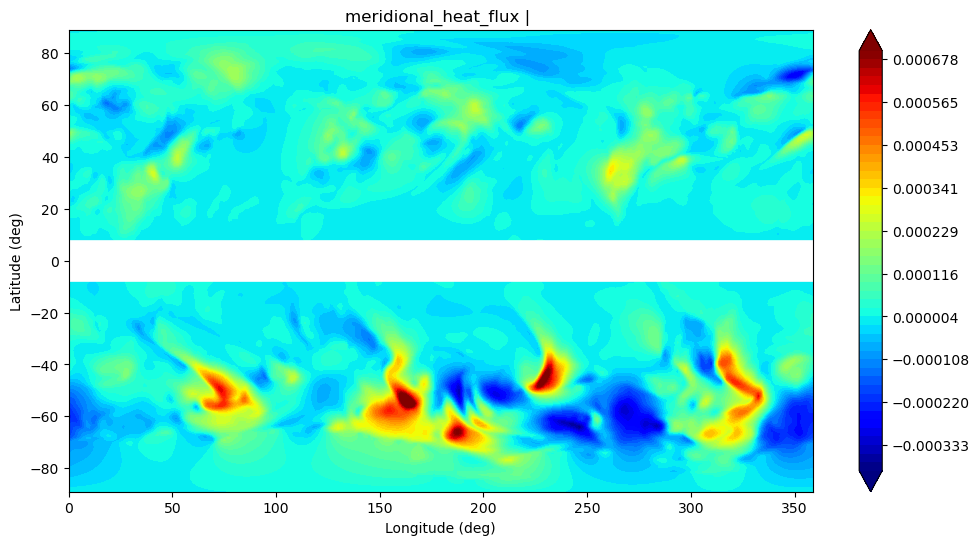

In [5]:
# if tstep == tstep_selected:
plev_selected = 22

xlon = file('xlon')
ylat = file('ylat')

height = qgfield_object.height


# === Below demonstrate another way to access the computed variables ===
# 3D Variables that I would choose one pressure level to display
variables_3d = [
    (qgfield_object.qgpv, 'Quasigeostrophic potential vorticity (QGPV)'),
    (qgfield_object.lwa, 'Local wave activity (LWA)'),
    (qgfield_object.interpolated_u, 'Interpolated zonal wind (u)'),
    (qgfield_object.interpolated_v, 'Interpolated meridional wind (v)')]

# Reference states to be displayed on y-z plane
variables_yz = [
    (qgfield_object.qref, 'Qref'),
    (qgfield_object.uref, 'Uref'),
    (qgfield_object.ptref, 'PTref')]

# Vertically averaged variables to be displayed on x-y plane
variables_xy = [
    (qgfield_object.adv_flux_f1, 'Advective flux F1'),
    (qgfield_object.adv_flux_f2, 'Advective flux F2'),
    (qgfield_object.adv_flux_f3, 'Advective flux F3'),
    (qgfield_object.convergence_zonal_advective_flux, 'Advective flux convergence -Div(F1+F2+F3)'),
    (qgfield_object.divergence_eddy_momentum_flux, 'divergence_eddy_momentum_flux'),
    (qgfield_object.meridional_heat_flux, 'meridional_heat_flux')
]

# Plot 240 hPa of 3D-variables
for variable, name in variables_3d:
    plt.figure(figsize=(12,4))
    plt.contourf(xlon, ylat[equator_idx:-1], variable[plev_selected, equator_idx:-1, :], 50, cmap='jet', extend='both')
    if name=='Local wave activity (LWA)':
        plt.axhline(y=0, c='w', lw=30)
    plt.colorbar()
    plt.ylabel('Latitude (deg)')
    plt.xlabel('Longitude (deg)')
    plt.title(name + ' at 250hPa | ' + '')
    plt.show()

# Plot reference states
for variable, name in variables_yz:
    # Mask out equatorward region that is outside analysis boundary
    mask = np.zeros_like(variable)
    mask[:, equator_idx-eq_boundary_index-1:equator_idx+eq_boundary_index+1] = np.nan
    variable_masked = np.ma.array(variable, mask=mask)
    # Start plotting
    plt.figure(figsize=(6,4))
    plt.contourf(ylat[1:-1], height[1:-1], variable_masked[1:-1, 1:-1], 50, cmap='jet', extend='both')
    plt.axvline(x=0, c='w', lw=2)
    plt.xlabel('Latitude (deg)')
    plt.ylabel('Pseudoheight (m)')
    plt.colorbar()
    plt.title(name + ' | ' + '')
    plt.show()
    
# Plot fluxes (color axies have to be fixed)
plt.figure(figsize=(12,6))
plt.contourf(xlon, ylat[1:-1], variables_xy[0][0][1:-1, :], np.linspace(-100, 2401, 50), cmap='jet', extend='both')
plt.axhline(y=0, c='w', lw=30)
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')
plt.colorbar()
plt.title(variables_xy[0][1] + ' | ' + '')
plt.show()

plt.figure(figsize=(12,6))
plt.contourf(xlon, ylat[1:-1], variables_xy[1][0][1:-1, :], np.linspace(-1440, 1601, 50), cmap='jet', extend='both')
plt.axhline(y=0, c='w', lw=30)
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')
plt.colorbar()
plt.title(variables_xy[1][1] + ' | ' + '')
plt.show()

plt.figure(figsize=(12,6))
plt.contourf(xlon, ylat[1:-1], variables_xy[2][0][1:-1, :], np.linspace(-1300, 501, 50), cmap='jet', extend='both')
plt.axhline(y=0, c='w', lw=30)
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')
plt.colorbar()
plt.title(variables_xy[2][1] + ' | ' + '')
plt.show()

plt.figure(figsize=(12,6))
plt.contourf(xlon, ylat[1:-1], variables_xy[3][0][1:-1, :], np.linspace(-0.004, 0.0041, 50), cmap='jet', extend='both')
plt.axhline(y=0, c='w', lw=30)
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')
plt.colorbar()
plt.title(variables_xy[3][1] +' | ' + '')
plt.show()

plt.figure(figsize=(12,6))
plt.contourf(xlon, ylat[1:-1], variables_xy[4][0][1:-1, :], np.linspace(-0.0015, 0.0015, 50), cmap='jet', extend='both')
plt.axhline(y=0, c='w', lw=30)
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')
plt.colorbar()
plt.title(variables_xy[4][1] +' | ' + '')
plt.show()

plt.figure(figsize=(12,6))
plt.contourf(xlon, ylat[1:-1], variables_xy[5][0][1:-1, :], np.linspace(-0.0004, 0.0007, 50), cmap='jet', extend='both')
plt.axhline(y=0, c='w', lw=30)
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')
plt.colorbar()
plt.title(variables_xy[5][1] +' | ' + '')
plt.show()

# print('tstep = {}/{}\n'.format(tstep, ntimes))
    

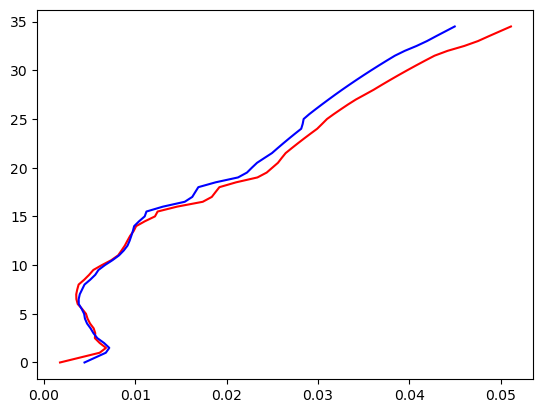

In [6]:
plt.plot( qgfield_object.static_stability[0], qgfield_object.height/1000,  color= 'r')
plt.plot( qgfield_object.static_stability[1], qgfield_object.height/1000,  color= 'b')

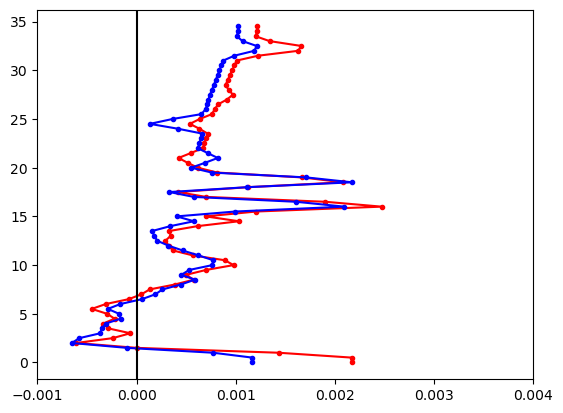

In [7]:
plt.plot( np.gradient(qgfield_object.static_stability[0]), qgfield_object.height/1000, '.-',  color= 'r')
plt.plot( np.gradient(qgfield_object.static_stability[1]), qgfield_object.height/1000,  '.-', color= 'b')
plt.xlim(-0.001, 0.004)
plt.axvline(0, color='k')